<a href="https://colab.research.google.com/github/bcury/Python-Projects/blob/main/calculo_taxa_retorno_ROI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ROI = (Invest final - invest incial) / invest inicial***

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import requests
from bs4 import BeautifulSoup
import datetime
from dateutil.relativedelta import relativedelta
import plotly.graph_objects as Dash


vamos usar a API do Yahoo Finance neste caso como exemplo de 2017, já convertida para csv

In [39]:
base = pd.read_csv('/content/AAPL.csv')

In [13]:
pagina = requests.get(site)

In [14]:
coleta = BeautifulSoup(pagina.text, 'html.parser')

In [15]:
print(coleta.title)

<title>Yahoo</title>


In [32]:
tabelas = coleta.find_all('table')

In [33]:
print('Localizado:', len(tabelas),'tabelas')

Localizado: 1 tabelas


In [36]:
tabelas

[<table>
 <tbody><tr>
 <td>
 <img alt="Yahoo Logo" src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png"/>
 <h1 style="margin-top:20px;">Will be right back...</h1>
 <p id="message-1">Thank you for your patience.</p>
 <p id="message-2">Our engineers are working quickly to resolve the issue.</p>
 </td>
 </tr>
 </tbody></table>]

In [40]:
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-18,35.352501,35.509998,35.277500,35.299999,33.371307,58790000
1,2017-04-19,35.470001,35.500000,35.112499,35.169998,33.248409,69313600
2,2017-04-20,35.305000,35.730000,35.290001,35.610001,33.664371,93278400
3,2017-04-21,35.610001,35.669998,35.462502,35.567501,33.624195,69283600
4,2017-04-24,35.875000,35.987499,35.794998,35.910000,33.947987,68537200


podemos mudar a equação do ROI: 

In [41]:
base['ROI'] = (base['Adj Close'] / base['Adj Close'].shift(1)-1)

In [42]:
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ROI
0,2017-04-18,35.352501,35.509998,35.277500,35.299999,33.371307,58790000,NaN
1,2017-04-19,35.470001,35.500000,35.112499,35.169998,33.248409,69313600,-0.003683
2,2017-04-20,35.305000,35.730000,35.290001,35.610001,33.664371,93278400,0.012511
3,2017-04-21,35.610001,35.669998,35.462502,35.567501,33.624195,69283600,-0.001193
4,2017-04-24,35.875000,35.987499,35.794998,35.910000,33.947987,68537200,0.009630


a função shift que vem do pandas, nos permite usar o valor do dia anterior de forma menos estatica, assim podemos encontrar o ROI de um dia para o outro, usando o valor atual sobre o valor do dia anterior

In [49]:
base.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ROI
18,2017-05-12,38.674999,39.105000,38.667500,39.025002,37.045063,130108000,0.013966
19,2017-05-15,39.002499,39.162498,38.762501,38.924999,36.950138,104038800,-0.002562
20,2017-05-16,38.985001,39.014999,38.680000,38.867500,36.895554,80194000,-0.001477
21,2017-05-17,38.400002,38.642502,37.427502,37.562500,35.656765,203070800,-0.033576
22,2017-05-18,37.817501,38.334999,37.782501,38.134998,36.200214,134272800,0.015241


In [43]:
#gráficos

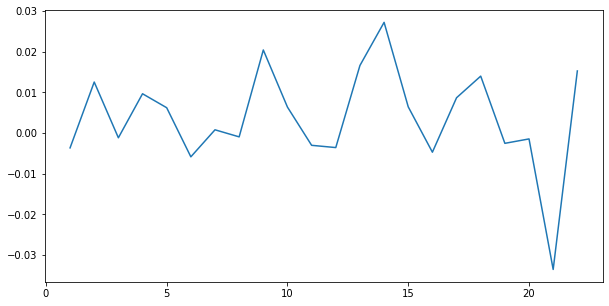

In [45]:
base['ROI'].plot(figsize = (10,5));


percebemos bastante oscilações

Para uma melhor análise, vamos verificar a média desse retorno multiplicada pelos dias uteis no ano(%):

In [46]:
ROI_medio = round(base['ROI'].mean()*250,5)

In [47]:
ROI_medio

0.9447

In [48]:
print(str(round(ROI_medio*100,2))+'%')

94.47%


então temos considerando essa base de dados que tivemos o retorno de investimento de 94,47% em 2007

Para terminar, de forma geral, podemos obter valores da Microsoft , google, amazon, entre outras, mas aqui vou focar na AMAZON

In [67]:
stickers = ['AMZN']

In [68]:
dados = pd.DataFrame()

In [69]:
for i in stickers:
  dados[i] = base['Adj Close']

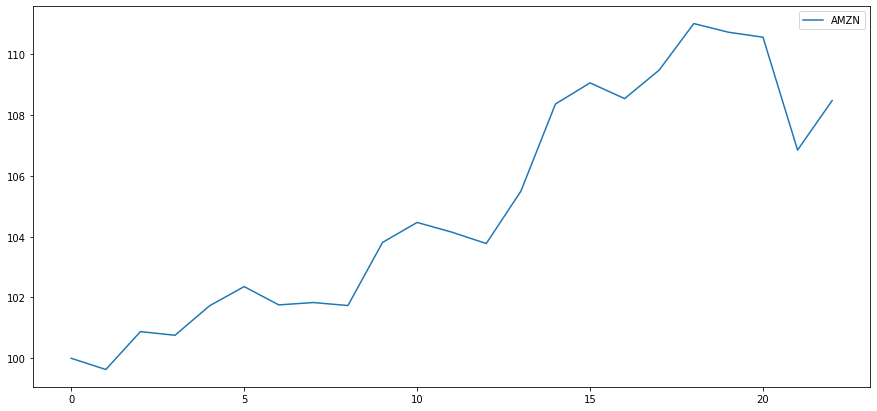

In [70]:
#VISUALIZAR
(dados/dados.iloc[0]*100).plot(figsize =(15,7))

aqui esta, o comportamento da ação da Amazon, agora vou calcular o seu ROI

In [71]:
roi_amazon = (dados/dados.shift(1))-1

In [72]:
roi_amazon.head()

,AMZN
0,NaN
1,-0.003683
2,0.012511
3,-0.001193
4,0.009630


pegando a média igual anteriormente

In [73]:
media_roi_amazon = round(roi_amazon.mean()*250,5)

In [74]:
print(str(round(media_roi_amazon*100,2)))

AMZN    94.47
dtype: float64


Portanto a ação Amazon teve ROI de 94,47% neste ano em questão